# Basic Deep Learning Face Recogntion
## Building a Friends TV Show Character Identifier

## The learning objective of this lesson (25.1) is the create a 'dumb' face classifer using our LittleVGG model. We are simply training it with 100s of pictures of each Friends Character, and testing our model using a Test Video. 

## You will see how this is an in-effective way to do Face Recognition, why?
Because a traditional CNN will be looking at small subsections of a face to identify it. However, the angle and deformation of a face can easily throw off our model, making it mis-classify and match it to faces that aren't correct - this will happen a lot especially when our training data looks different to our test data. Imagine if the training data, one face was titled downward mostly. Our CNN will more likely identify any future face on our test data that looks downward, to be that face.

### Let's train our model
I've created a dataset with the faces of 4 Friends characters taken from a handful of different scenes.

In [18]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [9]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 4
img_rows, img_cols = 220, 220
batch_size = 8

train_data_dir = 'E:/25. Face Recognition/faces/train'
validation_data_dir = 'E:/25. Face Recognition/faces/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Using TensorFlow backend.


Found 2663 images belonging to 4 classes.
Found 955 images belonging to 4 classes.


In [17]:
#Our Keras imports
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

### Creating a simple VGG based model for Face Recognition

In [9]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding = 'same',
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Block #1: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(32, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



# Block #vanish: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


# Block #vanish: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(1024, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 16)      64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
activation_2 (Activation)    (None, 220, 220, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 16)     

### Training our Model

In [6]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("E:/25. Face Recognition/face_recognition_friends_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 15,
                          verbose = 2,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.4, patience = 1, verbose = 1, min_delta = 0.00000000000000000000000000001)

# we put our call backs into a callback list
callbacks = [checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 2663
nb_validation_samples = 955
epochs = 70

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/70
332/332 [==============================] - ETA: 0s - loss: 1.5805 - accuracy: 0.4403
Epoch 00001: val_loss improved from inf to 1.64990, saving model to E:/25. Face Recognition\face_recognition_friends_vgg.h5
332/332 [==============================] - 58s 175ms/step - loss: 1.5805 - accuracy: 0.4403 - val_loss: 1.6499 - val_accuracy: 0.4317
Epoch 2/70
332/332 [==============================] - ETA: 0s - loss: 1.0288 - accuracy: 0.6139
Epoch 00002: val_loss improved from 1.64990 to 0.55438, saving model to E:/25. Face Recognition\face_recognition_friends_vgg.h5
332/332 [==============================] - 39s 118ms/step - loss: 1.0288 - accuracy: 0.6139 - val_loss: 0.5544 - val_accuracy: 0.7847
Epoch 3/70
332/332 [==============================] - ETA: 0s - loss: 0.8605 - accuracy: 0.6810
Epoch 00003: val_loss improved from 0.55438 to 0.42773, saving model to E:/25. Face Recognition\face_recognition_fri

In [1]:
from __future__ import print_function
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 4
img_rows, img_cols = 120, 120
batch_size = 8

train_data_dir = 'E:/25. Face Recognition/faces/train'
validation_data_dir = 'E:/25. Face Recognition/faces/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Using TensorFlow backend.


Found 2663 images belonging to 4 classes.
Found 955 images belonging to 4 classes.


In [2]:
#Our Keras imports
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import ELU
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [3]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding = 'same',
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# Block #1: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))



# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#.......................................................................

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#.......................................................................


# Block #7: softmax classifier
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 120, 120, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        1

In [4]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("E:/25. Face Recognition/2.face_recognition_friends_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 15,
                          verbose = 2,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.4, patience = 1, verbose = 1, min_delta = 0.00000000000000000000000000001)

# we put our call backs into a callback list
callbacks = [checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 2663
nb_validation_samples = 955
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 332 steps, validate for 119 steps
Epoch 1/10
331/332 [============================>.] - ETA: 0s - loss: 1.1603 - accuracy: 0.5614
Epoch 00001: val_loss improved from inf to 2.93036, saving model to E:/25. Face Recognition/2.face_recognition_friends_vgg.h5
332/332 [==============================] - 53s 160ms/step - loss: 1.1580 - accuracy: 0.5623 - val_loss: 2.9304 - val_accuracy: 0.1912
Epoch 2/10
330/332 [============================>.] - ETA: 0s - loss: 0.7323 - accuracy: 0.7238
Epoch 00002: val_loss improved from 2.93036 to 0.71819, saving model to E:/25. Face Recognition/2.face_recognition_friends_vgg.h5
332/332 [==============================] - 14s 43ms/step - loss: 0.7315 - accuracy: 0.7235 - val_loss: 0.7182 - val_accuracy: 0.7174
Epoch 3/10
331/332 [============================>.] - ETA: 0s - loss: 0.6088 - accuracy: 0.7779
Epoch 00003: val_loss improved from 0.71819 to 0.68769, saving model to E:/25. Face Recognition

In [6]:
from tensorflow.keras.models import load_model
classifier = load_model('E:/25. Face Recognition/2.face_recognition_friends_vgg.h5')

Found 955 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[364   0   3   0]
 [  0  76   0   0]
 [  1   0 431   0]
 [  0   1   0  79]]
Classification Report
              precision    recall  f1-score   support

    Chandler       1.00      0.99      0.99       367
        Joey       0.99      1.00      0.99        76
      Pheobe       0.99      1.00      1.00       432
      Rachel       1.00      0.99      0.99        80

    accuracy                           0.99       955
   macro avg       0.99      0.99      0.99       955
weighted avg       0.99      0.99      0.99       955



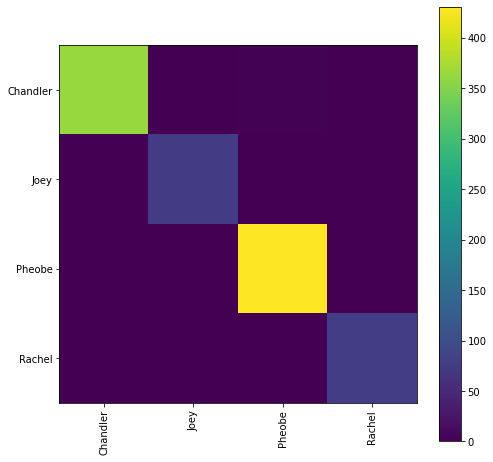

In [7]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 2663
nb_validation_samples = 955

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [9]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 120, 120

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'E:/25. Face Recognition/faces/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Testing our model on some real video

In [ ]:
from os import listdir
from os.path import isfile, join
import os
import cv2
import numpy as np


face_classes = {0: 'Chandler', 1: 'Joey', 2: 'Pheobe', 3: 'Rachel'}

def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)
    
margin = 0.2
# load model and weights
img_size = 64

detector = dlib.get_frontal_face_detector()

cap = cv2.VideoCapture('testfriends.mp4')

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    preprocessed_faces = []           
 
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = np.shape(input_img)
    detected = detector(frame, 1)
    faces = np.empty((len(detected), img_size, img_size, 3))
    
    preprocessed_faces_emo = []
    if len(detected) > 0:
        for i, d in enumerate(detected):
            x1, y1, x2, y2, w, h = d.left(), d.top(), d.right() + 1, d.bottom() + 1, d.width(), d.height()
            xw1 = max(int(x1 - margin * w), 0)
            yw1 = max(int(y1 - margin * h), 0)
            xw2 = min(int(x2 + margin * w), img_w - 1)
            yw2 = min(int(y2 + margin * h), img_h - 1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            # cv2.rectangle(img, (xw1, yw1), (xw2, yw2), (255, 0, 0), 2)
            #faces[i, :, :, :] = cv2.resize(frame[yw1:yw2 + 1, xw1:xw2 + 1, :], (img_size, img_size))
            face =  frame[yw1:yw2 + 1, xw1:xw2 + 1, :]
            face = cv2.resize(face, (48, 48), interpolation = cv2.INTER_AREA)
            face = face.astype("float") / 255.0
            face = img_to_array(face)
            face = np.expand_dims(face, axis=0)
            preprocessed_faces.append(face)

        # make a prediction for Emotion 
        face_labels = []
        for i, d in enumerate(detected):
            preds = classifier.predict(preprocessed_faces[i])[0]
            face_labels.append(face_classes[preds.argmax()])
        
        # draw results
        for i, d in enumerate(detected):
            label = "{}".format(face_labels[i])
            draw_label(frame, (d.left(), d.top()), label)

    cv2.imshow("Friend Character Identifier", frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()      